# Introduction to Time Series

Introduce basic components and terminologies of the time series. Use sample data to show plots and some simple forecasting methods before we do anything complex.

In [0]:
!pip install quandl

In [0]:
## Load Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Quandl package for the Finance data
import quandl

In [225]:
# Load Tesla Stock Price sample data
tesla = quandl.get('WIKI/TSLA')
print('Start date: ',tesla.index.values[0],' End date: ',tesla.index.values[-1])
tesla.head(2)

Start date:  2010-06-29T00:00:00.000000000  End date:  2018-03-27T00:00:00.000000000


,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0


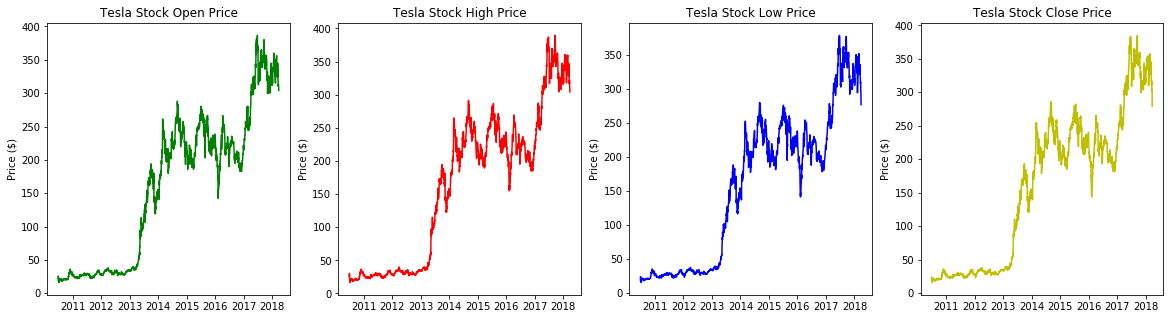

In [217]:
## Display the High price and Low price by date
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(20,5))
axes[0].plot(tesla.index, tesla['Adj. Open'], 'g')
axes[0].title.set_text('Tesla Stock Open Price')
axes[0].set_ylabel('Price ($)')
axes[1].plot(tesla.index, tesla['Adj. High'], 'r')
axes[1].title.set_text('Tesla Stock High Price')
axes[1].set_ylabel('Price ($)')
axes[2].plot(tesla.index, tesla['Adj. Low'], 'b')
axes[2].title.set_text('Tesla Stock Low Price')
axes[2].set_ylabel('Price ($)')
axes[3].plot(tesla.index, tesla['Adj. Close'], 'y')
axes[3].title.set_text('Tesla Stock Close Price')
axes[3].set_ylabel('Price ($)')
plt.show()

## Time Series Components

### Trend

There are three types of trend:

**Uptrend**: With higher highs + higher lows

**Downtrend**: With lower highs + lower lows
**Horizontal Trend**: Also called the stationary trend without a clear clue of uptrend or downtrend.

In [0]:
## Subset of the data
indexs = tesla.index.values
indexs_date = np.array([str(d).split('T')[0] for d in indexs])
tesla_sub1 = tesla.iloc[np.where(indexs_date=='2013-01-02')[0][0]:np.where(indexs_date=='2014-01-02')[0][0],:]
tesla_sub2 = tesla.iloc[np.where(indexs_date=='2014-01-02')[0][0]:np.where(indexs_date=='2015-05-01')[0][0],:]
tesla_sub3 = tesla.iloc[np.where(indexs_date=='2015-10-02')[0][0]:np.where(indexs_date=='2016-03-01')[0][0],:]

In [0]:
higher_high
higher_high_date

numpy.datetime64('2013-10-01T00:00:00.000000000')

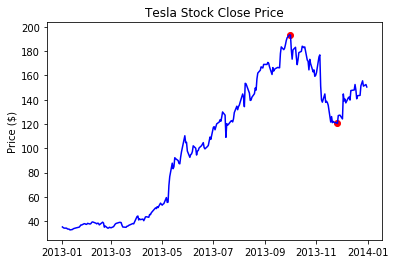

In [0]:
# Close Price from 2013-01-02 to 2014-01-02
indexs1 = tesla_sub1.index.values
indexs_date1 = np.array([str(d).split('T')[0] for d in indexs1])
indexs_month = np.array([date.split('-')[0]+date.split('-')[1] for date in indexs_date1])
# Higher high
higher_high = np.max(tesla_sub1['Adj. Close'].values[np.where(indexs_month=='201310')[0]])
higher_high_date = indexs1[np.where(tesla_sub1['Adj. Close'].values==higher_high)[0]][0]
# Lower low
higher_low = np.min(tesla_sub1['Adj. Close'].values[np.where(indexs_month=='201311')[0]])
higher_low_date = indexs1[np.where(tesla_sub1['Adj. Close'].values==higher_low)[0]][0]

# Plot higher high and higher low
plt.plot(tesla_sub1.index, tesla_sub1['Adj. Close'], 'b')
plt.scatter(higher_high_date,higher_high,color='r')
plt.scatter(higher_low_date,higher_low,color='r')
plt.title('Tesla Stock Close Price')
plt.ylabel('Price ($)')
plt.show()

Here we could see the clear increasing trend by the time. This can be considered as an uptrend. The two red dots represent the higher high and the higher low.

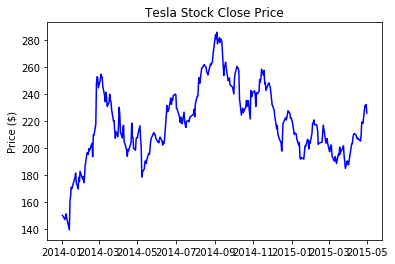

In [0]:
plt.plot(tesla_sub2.index, tesla_sub2['Adj. Close'], 'b')
plt.title('Tesla Stock Close Price')
plt.ylabel('Price ($)')
plt.show()

From 2014-02 to 2014-12, there is a generally steady trend, which means no clear big increase or decrease in a realatively long time period. As a result, we could consider a horizontal trend in this time range.

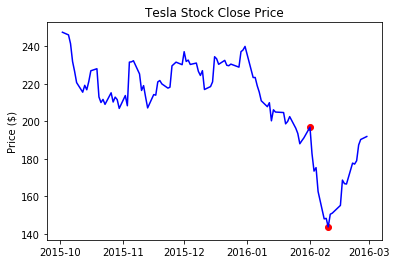

In [0]:
# Close Price from 2015-10-02 to 2016-03-01
indexs3 = tesla_sub3.index.values
indexs_date3 = np.array([str(d).split('T')[0] for d in indexs3])
indexs_month3 = np.array([date.split('-')[0]+date.split('-')[1] for date in indexs_date3])
# Higher high
lower_high = np.max(tesla_sub3['Adj. Close'].values[np.where(indexs_month3=='201602')[0]])
lower_high_date = indexs3[np.where(tesla_sub3['Adj. Close'].values==lower_high)[0]][0]
# Lower low
lower_low = np.min(tesla_sub3['Adj. Close'].values[np.where(indexs_month3=='201602')[0]])
lower_low_date = indexs3[np.where(tesla_sub3['Adj. Close'].values==lower_low)[0]][0]


# Plot higher high and higher low
plt.plot(tesla_sub3.index, tesla_sub3['Adj. Close'], 'b')
plt.scatter(lower_high_date,lower_high,color='r')
plt.scatter(lower_low_date,lower_low,color='r')
plt.title('Tesla Stock Close Price')
plt.ylabel('Price ($)')
plt.show()

We can see that during the period from 2015-12 to 2016-02, there is a clear downtrend. The two red dots are the lower high and the lower low.

### Seasonality

Seasonality pattern appears regularly by season or a relatively short time period. For instance, Tesla usually can not achieve the goal production quantity for one season of the year, then the stock price would drop regularly at that time of the year, vice versa.

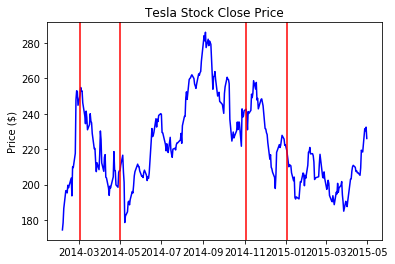

In [0]:
# subset
tesla_sub2 = tesla.iloc[np.where(indexs_date=='2014-02-05')[0][0]:np.where(indexs_date=='2015-05-01')[0][0],:]
indexs2 = tesla_sub2.index.values
indexs_date2 = np.array([str(d).split('T')[0] for d in indexs2])
indexs_month2 = np.array([date.split('-')[0]+date.split('-')[1] for date in indexs_date2])

# two seasonal periods
period = [indexs2[np.where(indexs_month2=='201403')[0][0]],indexs2[np.where(indexs_month2=='201405')[0][0]],\
          indexs2[np.where(indexs_month2=='201411')[0][0]],indexs2[np.where(indexs_month2=='201501')[0][0]]]

plt.plot(tesla_sub2.index, tesla_sub2['Adj. Close'], 'b')
for xc in period:
    plt.axvline(x=xc, c='r')
plt.title('Tesla Stock Close Price')
plt.ylabel('Price ($)')
plt.show()

Because the stock price is generally irregular, the seasonal pattern is a bit rough. But we could still find the close trends between a fixed amount of time.

### Cyclical Patterns

Cyclical pattern consists of Rise and Fall in a not fixed Period. There are no repeating patterns (more random).

**Cyclical uptrend**: Bull market

**Cyclical downtrend**: Bear market

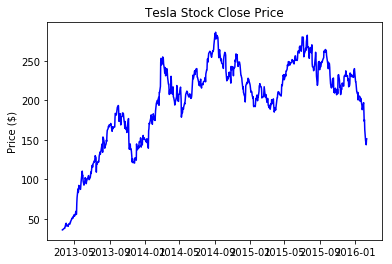

In [0]:
tesla_sub4 = tesla.iloc[np.where(indexs_date=='2013-03-20')[0][0]:np.where(indexs_date=='2016-02-16')[0][0],:]
plt.plot(tesla_sub4.index, tesla_sub4['Adj. Close'], 'b')
plt.title('Tesla Stock Close Price')
plt.ylabel('Price ($)')
plt.show()

We could see, it is hard to find regular and identical trend or pattern. It is very typical in the stock market. Above we could see the uptrend at left and an downtrend at right. The whole period lasts  aobut 3 years.

## Time Series Plots

### Seasonal Plots

### Seasonal suberies plot

### Scatter Plot

### Lag plot

## Simple Time Series Forecasting Methods



In [0]:
## Predict the most recent Close Price
predict_date = tesla.index.values[-1]
true_close_price = tesla['Adj. Close'].values[-1]
tesla_drop = tesla.drop(predict_date)

In [229]:
print('The date of the close price we want to predict is ',str(predict_date).split('T')[0],' and the true close price is ',true_close_price)

The date of the close price we want to predict is  2018-03-27  and the true close price is  279.18


### Average Method

The best predictior of what will happen tomorrow is the average of everything that has happened up until now.

In [230]:
ave_close_price = np.mean(tesla_drop['Adj. Close'].values)
print('The average method gives a prediction: ',ave_close_price,', the difference compared to the true price is ',abs(true_close_price-ave_close_price))

The average method gives a prediction:  158.57925462012318 , the difference compared to the true price is  120.60074537987683


### Moving Average

Average of defined number of time periods.

In [237]:
## Select the last 2 months prices for the average
indexs = tesla_drop.index.values
indexs_date = np.array([str(d).split('T')[0] for d in indexs])
indexs_month = np.array([date.split('-')[0]+date.split('-')[1] for date in indexs_date])
mov_avg = (np.mean(tesla_drop['Adj. Close'].values[np.where(indexs_month=='201802')[0]])+np.mean(tesla_drop['Adj. Close'].values[np.where(indexs_month=='201803')[0]]))/2
print('The moving average method gives a prediction: ',mov_avg,', the difference compared to the true price is ',abs(true_close_price-mov_avg))

The moving average method gives a prediction:  329.9064766081872 , the difference compared to the true price is  50.72647660818717


### Naive Method

All forcasts can simply set to be the value of the last observation

If there is not enough data to create a predictie model, the naive method can supplement forcasts for the near future.

In [238]:
last_date_price = tesla_drop['Adj. Close'].values[-1]
print('The naive method gives a prediction: ',last_date_price,', the difference compared to the true price is ',abs(true_close_price-last_date_price))

The naive method gives a prediction:  304.18 , the difference compared to the true price is  25.0


### Seasonal Naive Method

Assumes that the magnitude of the seasonal pattern will remain constant.

In [239]:
seasonal_naive = tesla_drop['Adj. Close'].values[np.where(indexs_month=='201802')[0][-1]]
print('The seasonal naive method gives a prediction: ',seasonal_naive,', the difference compared to the true price is ',abs(true_close_price-seasonal_naive))

The seasonal naive method gives a prediction:  343.06 , the difference compared to the true price is  63.879999999999995


### Drift Method

A variation on the naive method to allow forecasts to increase and decrease over time.

The amount of change over time is set to be the average change seen in the historical data.

In [252]:
from datetime import date
start = date(int(indexs_date[0].split('-')[0]),int(indexs_date[0].split('-')[1]),int(indexs_date[0].split('-')[2]))
end = date(int(indexs_date[-1].split('-')[0]),int(indexs_date[-1].split('-')[1]),int(indexs_date[-1].split('-')[2]))
passed = (end-start).days

change = (tesla_drop['Adj. Close'].values[-1]-tesla_drop['Adj. Close'].values[0])/(passed-1)
drift_pred = tesla_drop['Adj. Close'].values[-1] + change
print('The drift method gives a prediction: ',drift_pred,', the difference compared to the true price is ',abs(true_close_price-drift_pred))

The drift method gives a prediction:  304.2791825902336 , the difference compared to the true price is  25.099182590233568
